In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import os

In [2]:
save_path = ('figures/1b2_6')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
NUM_CLASSES = 7

epochs = 300
batch_size = 8
num_neurons = 30
seed = 10

l_r = 0.001

In [4]:
histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

In [6]:
# Shuffle
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [7]:
# Normalize
# X ~ N(0,1)
X_data = ((X_data - np.mean(X_data, axis = 0))/ np.std(X_data, axis =0))
print(X_data[1])

[0.3658602  0.26229304 0.79882862 0.59665321 0.61012728 0.13612981
 0.90911166]


In [8]:
trainY = Y_data[:280]
testY = Y_data[280:]

In [9]:
# remove input found from precious experiment
# input number 4, index number 3
X_d=[]
for i in range(len(X_data)):
    x_d = np.delete(X_data[i],np.array(3))
    X_d.append(x_d)

    x_data = np.array(X_d)
    print(x_data)

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.3873

 [-0.24499762 -0.23259949 -0.95202863  0.05293342 -0.58586611 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.2622930

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 0.62765641  0.42725722  0.79882862  0.61012728  0.92528814  0.90911166]
 [-0.85585544 -0.8924562  -0.07660001 -0.50426044 -0.5522849  -1.09997489]
 [ 0.1913294   0.42725722 -0.07660001  0.05293342  0.74059151 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.85585544 -0.8924562  -0.07660001 -0.50426044 -0.5522849  -1.09997489]
 [ 0.1913294   0.42725722 -0.07660001  0.05293342  0.74059151 -1.09997489]
 [ 2.02390285  0.92214975  0.79882862  1.724515    1.9159337   0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602 

In [10]:
trainX = x_data[:280]

testX = x_data[280:]

In [11]:
print(testX[:2])

[[ 0.97671802  1.41704229  1.67425725  1.724515    1.51295924  0.90911166]
 [ 0.3658602   1.08711393  0.79882862  1.724515    0.87491633 -1.09997489]]


In [12]:
starter_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dense(1, activation = 'linear')
])

In [13]:
starter_model.compile(optimizer='sgd',
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [14]:
histories['starter'] =starter_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 1,
                                        validation_data=(testX,testY)
                                       )

Epoch 1/300
35/35 [==============================] - 0s 3ms/step - loss: 0.1538 - mse: 0.1444 - val_loss: 0.0782 - val_mse: 0.0689
Epoch 2/300
35/35 [==============================] - ETA: 0s - loss: 0.0420 - mse: 0.032 - 0s 2ms/step - loss: 0.0640 - mse: 0.0547 - val_loss: 0.0652 - val_mse: 0.0559
Epoch 3/300
35/35 [==============================] - 0s 933us/step - loss: 0.0522 - mse: 0.0429 - val_loss: 0.0560 - val_mse: 0.0468
Epoch 4/300
35/35 [==============================] - 0s 883us/step - loss: 0.0446 - mse: 0.0353 - val_loss: 0.0505 - val_mse: 0.0412
Epoch 5/300
35/35 [==============================] - 0s 940us/step - loss: 0.0393 - mse: 0.0301 - val_loss: 0.0448 - val_mse: 0.0356
Epoch 6/300
35/35 [==============================] - 0s 930us/step - loss: 0.0357 - mse: 0.0265 - val_loss: 0.0435 - val_mse: 0.0343
Epoch 7/300
35/35 [==============================] - 0s 941us/step - loss: 0.0330 - mse: 0.0238 - val_loss: 0.0376 - val_mse: 0.0285
Epoch 8/300
35/35 [================

Epoch 62/300
35/35 [==============================] - 0s 969us/step - loss: 0.0130 - mse: 0.0048 - val_loss: 0.0146 - val_mse: 0.0064
Epoch 63/300
35/35 [==============================] - 0s 912us/step - loss: 0.0130 - mse: 0.0048 - val_loss: 0.0146 - val_mse: 0.0064
Epoch 64/300
35/35 [==============================] - 0s 912us/step - loss: 0.0129 - mse: 0.0047 - val_loss: 0.0147 - val_mse: 0.0065
Epoch 65/300
35/35 [==============================] - 0s 940us/step - loss: 0.0128 - mse: 0.0047 - val_loss: 0.0146 - val_mse: 0.0064
Epoch 66/300
35/35 [==============================] - 0s 940us/step - loss: 0.0128 - mse: 0.0047 - val_loss: 0.0145 - val_mse: 0.0063
Epoch 67/300
35/35 [==============================] - 0s 970us/step - loss: 0.0128 - mse: 0.0046 - val_loss: 0.0145 - val_mse: 0.0064
Epoch 68/300
35/35 [==============================] - 0s 1ms/step - loss: 0.0127 - mse: 0.0046 - val_loss: 0.0144 - val_mse: 0.0062
Epoch 69/300
35/35 [==============================] - 0s 940us/s

Epoch 123/300
35/35 [==============================] - 0s 1ms/step - loss: 0.0112 - mse: 0.0037 - val_loss: 0.0129 - val_mse: 0.0054
Epoch 124/300
35/35 [==============================] - 0s 884us/step - loss: 0.0112 - mse: 0.0037 - val_loss: 0.0129 - val_mse: 0.0054
Epoch 125/300
35/35 [==============================] - 0s 939us/step - loss: 0.0111 - mse: 0.0037 - val_loss: 0.0129 - val_mse: 0.0054
Epoch 126/300
35/35 [==============================] - 0s 940us/step - loss: 0.0112 - mse: 0.0037 - val_loss: 0.0128 - val_mse: 0.0054
Epoch 127/300
35/35 [==============================] - 0s 912us/step - loss: 0.0111 - mse: 0.0037 - val_loss: 0.0129 - val_mse: 0.0054
Epoch 128/300
35/35 [==============================] - 0s 940us/step - loss: 0.0111 - mse: 0.0037 - val_loss: 0.0128 - val_mse: 0.0054
Epoch 129/300
35/35 [==============================] - 0s 957us/step - loss: 0.0111 - mse: 0.0036 - val_loss: 0.0128 - val_mse: 0.0054
Epoch 130/300
35/35 [==============================] - 0s

Epoch 184/300
35/35 [==============================] - 0s 940us/step - loss: 0.0103 - mse: 0.0034 - val_loss: 0.0121 - val_mse: 0.0052
Epoch 185/300
35/35 [==============================] - 0s 911us/step - loss: 0.0103 - mse: 0.0034 - val_loss: 0.0121 - val_mse: 0.0052
Epoch 186/300
35/35 [==============================] - 0s 911us/step - loss: 0.0102 - mse: 0.0034 - val_loss: 0.0121 - val_mse: 0.0052
Epoch 187/300
35/35 [==============================] - 0s 912us/step - loss: 0.0102 - mse: 0.0034 - val_loss: 0.0121 - val_mse: 0.0052
Epoch 188/300
35/35 [==============================] - 0s 883us/step - loss: 0.0102 - mse: 0.0034 - val_loss: 0.0121 - val_mse: 0.0052
Epoch 189/300
35/35 [==============================] - 0s 911us/step - loss: 0.0102 - mse: 0.0034 - val_loss: 0.0121 - val_mse: 0.0052
Epoch 190/300
35/35 [==============================] - 0s 912us/step - loss: 0.0102 - mse: 0.0034 - val_loss: 0.0121 - val_mse: 0.0052
Epoch 191/300
35/35 [==============================] - 

Epoch 245/300
35/35 [==============================] - 0s 940us/step - loss: 0.0096 - mse: 0.0032 - val_loss: 0.0115 - val_mse: 0.0052
Epoch 246/300
35/35 [==============================] - 0s 912us/step - loss: 0.0096 - mse: 0.0033 - val_loss: 0.0115 - val_mse: 0.0051
Epoch 247/300
35/35 [==============================] - 0s 940us/step - loss: 0.0095 - mse: 0.0032 - val_loss: 0.0115 - val_mse: 0.0052
Epoch 248/300
35/35 [==============================] - 0s 940us/step - loss: 0.0095 - mse: 0.0032 - val_loss: 0.0114 - val_mse: 0.0051
Epoch 249/300
35/35 [==============================] - 0s 911us/step - loss: 0.0095 - mse: 0.0032 - val_loss: 0.0115 - val_mse: 0.0052
Epoch 250/300
35/35 [==============================] - 0s 940us/step - loss: 0.0095 - mse: 0.0032 - val_loss: 0.0114 - val_mse: 0.0051
Epoch 251/300
35/35 [==============================] - 0s 940us/step - loss: 0.0095 - mse: 0.0032 - val_loss: 0.0114 - val_mse: 0.0051
Epoch 252/300
35/35 [==============================] - 

In [15]:
print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(histories['starter'].history['loss'][-1], histories['starter'].history['val_loss'][-1]))

train m.s.e. = 0.009, test m.s.e. = 0.011


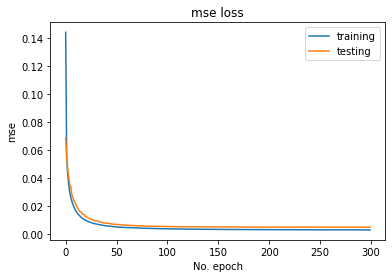

In [16]:
plt.plot(histories['starter'].history['mse'], label='training')
plt.plot(histories['starter'].history['val_mse'], label='testing')
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.title('mse loss')
plt.savefig('./%s/mse_VS_e'%(save_path))
plt.show()

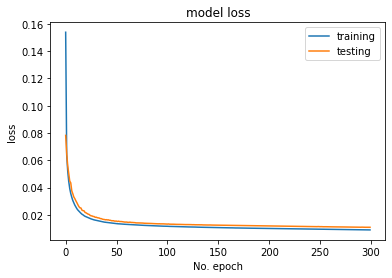

In [17]:
plt.plot(histories['starter'].history['loss'], label='training')
plt.plot(histories['starter'].history['val_loss'], label='testing')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.title("model loss")
plt.legend(loc="best")
plt.savefig('./%s/loss_vs_e.png'%(save_path))
plt.show()

In [18]:
prediction = starter_model.predict(testX)

In [20]:
MSE_scaled = mean_squared_error(testY, prediction)
print(MSE_scaled)

0.005100263319389378


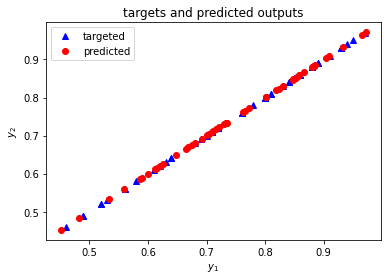

In [22]:
plot_targets = plt.plot(testY[:50], testY[:50], 'b^', label='targeted')
plot_pred = plt.plot(prediction[:50], prediction[:50], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('targets and predicted outputs')
plt.legend(loc="best")
plt.savefig('./%s/target_vs_predicted'%(save_path))
plt.legend()

In [23]:
print(prediction[:10])

[[0.93290126]
 [0.88395953]
 [0.700374  ]
 [0.73419595]
 [0.55875516]
 [0.8299297 ]
 [0.7113184 ]
 [0.7097521 ]
 [0.8550215 ]
 [0.9091114 ]]
